<div align="center" style='font-size: 21px; margin: 21px'><u><b>Классификация удовлетворённости пассажира</b><u></div>
 <div align="right"style=' margin-bottom: 21px'><u><b>* Построение модели для классификации удовлетворённости пассажира </b><u></div>
        

<b>Удовлетворенность</b> — это субъективная оценка потребителем степени удовлетворения желаний и требований, возникающих при приобретении или потреблении предоставленного продукта или услуги, а возможность повторного использования — это возможность того, что покупатель будет продолжать использовать продукт или услугу повторно после покупки. Чтобы доказать корреляцию между удовлетворенностью клиентов и намерением повторного использования, была продемонстрирована высокая корреляция между переменными путем проведения анализа корреляции между удовлетворенностью клиентов и намерением повторного использования для предприятий быстрого питания, предприятий по борьбе с вредителями, банков и прачечных за границей. Данные этого исследования представляют собой данные об удовлетворенности клиентов авиакомпаний, в том числе пол, возраст, питание и напитки на борту, удобство сидений и т. д. Они собираются Google Kaggle. Внедрение модели прогнозирования удовлетворенности клиентов авиакомпании и оценка эффективности выполняются с предварительной обработкой.

</p><b>Satisfaction</b> is a consumer's subjective evaluation of the extent to which desires and demands arising from
acquiring or consuming a provided product orservice are satisfied, and reusability isthe possibility that the customer
will continue to use the product or service repeatedly after purchasing. To prove the correlation between
customer satisfaction and reuse intention, a high correlation between variables is demonstrated by conducting a
correlation analysis between customer satisfaction and reuse intention for fast food businesses, pest control
businesses, banks, and laundry businesses overseas. 
<p>
    The data on this study are <b>Airline customer satisfaction data</b>, which are including gender, age, food and beverages
provided on board, seat comfort, etc. They are collected by <b>Google's Kaggle</b>.

Airline customer satisfaction prediction model implementation, and performance evaluation are conducted with pre-processing.

<!-- <a id="ref3"></a> 
 -->
 [rer](#ref2)
<div style="background-color: #BDDBF9; margin-top: 8px; padding: 22px; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px;">
    <p style='font-size: 21px'>Содержание</p>
    <ol>
        <li><a style='' href="#ref1">Описание данных</a></li>
        <li><a style='' href="#ref2">Импорт данных и подготовка</a></li>
        <li><a style='' href="#ref3">Изучение данных</a></li>
        <li><a style='' href="#ref4">Очистка данных</a></li>
        <li><a style='' href="#ref5">Визуализация данных</a></li>
        <li><a style='' href="#ref6">Создание модели</a></li> 
        <li><a style='' href="#ref7">Заключение</a></li>
    </ol>
</div>

<a id="ref2"></a> 
### Импорт библиотек, функций

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,plot_confusion_matrix, plot_roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline
import time
from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('github')
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

/var/folders/9_/ll5ms3kn1cvgh7ng385rxvq40000gn/T/ipykernel_3574/3052843872.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


This script was made to run only on Google Colab notebooks, other environments was not tested completely
You are not in Colab envirement, make sure you already have Plotly > 4.9.0 and kaleido


In [2]:
def show_missing(df):
    """Возвращает df - тип, количество, кол.уникальных, NaN и % NaN"""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'Колонка': variables, 
        'Тип значений': dtypes,
        'Количество значений': count,
        'Кол.уникальные значения': unique,
        'Кол.NaN': missing, 
        '% NaN': pc_missing
    })    
        
    return output

<br>

### Чтение и подготовка данных 

In [3]:
df = pd.read_csv("../f/Airline_Passenger_Satisfaction.csv", usecols=range(1,25))

In [4]:
pd.set_option('display.max_columns', None)
df.sample(4)

,ID,Пол,Возраст,Тип клиента,Тип путешествия,Класс,Дальность полёта,Задержка вылета,Задержка прибытия,Удобство времени вылета и прибытия,Простота онлайн бронирования,Услуга регистрации заезда,Онлайн-посадка,Расположение ворот,Обслуживание на борту,Комфорт сидения,Обслуживание в номерах для ног,Чистоплотность,Еда и напитки,Обслуживание понимаете,Услуга wi-fi в полёте,Развлечения на борту,Обработка багажа,Удовлетворённость
40968,40969,Женщина,36,Возвращаемый,Личный,Эконом класс,507,0,0.0,5,2,4,2,3,1,4,5,4,4,3,2,4,5,Удовлетворённый
94026,94027,Женщина,47,Возвращаемый,Бизнес,Бизнес класс,2063,17,6.0,4,1,5,5,4,4,5,4,4,2,4,4,4,4,Неудовлетворённый
60618,60619,Женщина,52,Возвращаемый,Бизнес,Бизнес класс,1201,0,0.0,1,4,3,4,1,4,5,4,5,5,4,1,4,4,Неудовлетворённый
5893,5894,Мужчина,54,Возвращаемый,Бизнес,Бизнес класс,3295,0,1.0,1,1,5,4,1,5,4,5,5,5,5,1,5,5,Неудовлетворённый


###  Преобразуем именно столбцов в формат camelCase

In [5]:
df.rename(columns = {'Пол': 'gender', 
                     'Возраст': 'age', 
                     'Тип клиента': 'customerType', 
                     'Тип путешествия': 'typeOfTravel', 
                     'Класс': 'class',
                     'Дальность полёта': 'flightDistance', 
                     'Задержка вылета': 'departureDelay', 
                     'Задержка прибытия': 'arrivalDelay',
                     'Удобство времени вылета и прибытия': 'departureAndArrivalTimeConvenience', 
                     'Простота онлайн бронирования': 'easeOfOnlineBooking',
                     'Услуга регистрации заезда': 'checkinService', 
                     'Онлайн-посадка': 'onlineBoarding', 
                     'Расположение ворот': 'gateLocation',
                     'Обслуживание на борту': 'onboardService', 
                     'Комфорт сидения': 'seatComfort', 
                     'Обслуживание в номерах для ног': 'legRoomService', 
                     'Чистоплотность': 'cleanliness',
                     'Еда и напитки': 'foodAndDrink', 
                     'Обслуживание понимаете': 'inflightService', 
                     'Услуга wi-fi в полёте': 'inflightWifiService',
                     'Развлечения на борту': 'inflightEntertainment',
                     'Обработка багажа': 'baggageHandling', 
                     'Удовлетворённость': 'satisfaction'}, inplace = True)


<br><a id="ref3"></a> 
### Изучение данных 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ID                                  129880 non-null  int64  
 1   gender                              129880 non-null  object 
 2   age                                 129880 non-null  int64  
 3   customerType                        129880 non-null  object 
 4   typeOfTravel                        129880 non-null  object 
 5   class                               129880 non-null  object 
 6   flightDistance                      129880 non-null  int64  
 7   departureDelay                      129880 non-null  int64  
 8   arrivalDelay                        129487 non-null  float64
 9   departureAndArrivalTimeConvenience  129880 non-null  int64  
 10  easeOfOnlineBooking                 129880 non-null  int64  
 11  checkinService            

In [7]:
df.dtypes

ID                                      int64
gender                                 object
age                                     int64
customerType                           object
typeOfTravel                           object
class                                  object
flightDistance                          int64
departureDelay                          int64
arrivalDelay                          float64
departureAndArrivalTimeConvenience      int64
easeOfOnlineBooking                     int64
checkinService                          int64
onlineBoarding                          int64
gateLocation                            int64
onboardService                          int64
seatComfort                             int64
legRoomService                          int64
cleanliness                             int64
foodAndDrink                            int64
inflightService                         int64
inflightWifiService                     int64
inflightEntertainment             

In [8]:
df.columns

Index(['ID', 'gender', 'age', 'customerType', 'typeOfTravel', 'class',
       'flightDistance', 'departureDelay', 'arrivalDelay',
       'departureAndArrivalTimeConvenience', 'easeOfOnlineBooking',
       'checkinService', 'onlineBoarding', 'gateLocation', 'onboardService',
       'seatComfort', 'legRoomService', 'cleanliness', 'foodAndDrink',
       'inflightService', 'inflightWifiService', 'inflightEntertainment',
       'baggageHandling', 'satisfaction'],
      dtype='object')

> краткий обзор, что содержит данные 

In [9]:
# Создаем df-обзор колонок
df_about = show_missing(df)

In [10]:
# Переворачиваем таблицу
df_about = df_about.transpose().rename(columns=df_about.transpose().iloc[0]).iloc[1:,:]

In [11]:
df_about

,ID,gender,age,customerType,typeOfTravel,class,flightDistance,departureDelay,arrivalDelay,departureAndArrivalTimeConvenience,easeOfOnlineBooking,checkinService,onlineBoarding,gateLocation,onboardService,seatComfort,legRoomService,cleanliness,foodAndDrink,inflightService,inflightWifiService,inflightEntertainment,baggageHandling,satisfaction
Тип значений,int64,object,int64,object,object,object,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object
Количество значений,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
Кол.уникальные значения,129880,2,75,2,2,3,3821,466,473,6,6,6,6,6,6,6,6,6,6,6,6,6,5,2
Кол.NaN,0,0,0,0,0,0,0,0,393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Уникальные значения столбцов
df_about.iloc[[2]]

,ID,gender,age,customerType,typeOfTravel,class,flightDistance,departureDelay,arrivalDelay,departureAndArrivalTimeConvenience,easeOfOnlineBooking,checkinService,onlineBoarding,gateLocation,onboardService,seatComfort,legRoomService,cleanliness,foodAndDrink,inflightService,inflightWifiService,inflightEntertainment,baggageHandling,satisfaction
Кол.уникальные значения,129880,2,75,2,2,3,3821,466,473,6,6,6,6,6,6,6,6,6,6,6,6,6,5,2


In [13]:
print("Количество пассажиров:          ", df.shape[0])
print("Количество атрибутов в таблице:   ",df.shape[1])

Количество пассажиров:           129880
Количество атрибутов в таблице:    24


<a id="ref4"></a> 
<br>
## Очистка данных 
- избавимся от 
* Дубликатов
* Нулевых значений

#### Заполнение пропусков столбца "Задержка прибытия" средним значением 

In [14]:
df.arrivalDelay = df.arrivalDelay.fillna(df.arrivalDelay.mean())

In [15]:
print('Количество нулевых значений :',df.isna().sum().sum())

Количество нулевых значений : 0


In [16]:
print('Количество дубликатов :',df.duplicated().sum())

Количество дубликатов : 0


##### Теперь наши данные готовы к изучению, визуализации и, наконец, к прогнозированию.

### Получим уникальные значения определённых столбцов 

In [17]:
list_unique = ['gender', 'customerType', 'class', 'satisfaction', 'typeOfTravel']
dict_unique = {}

In [18]:
print('УНИКАЛЬНЫЕ ЗНАЧЕНИЯ СТОЛБЦОВ:')
for (index, i) in enumerate(list_unique): 
    print(i, ' - ',  df[f'{i}'].unique())

УНИКАЛЬНЫЕ ЗНАЧЕНИЯ СТОЛБЦОВ:
gender  -  ['Мужчина' 'Женщина']
customerType  -  ['Первый раз' 'Возвращаемый']
class  -  ['Бизнес класс' 'Эконом класс' 'Эконом плюс']
satisfaction  -  ['Удовлетворённый' 'Неудовлетворённый']
typeOfTravel  -  ['Бизнес' 'Личный']


<br><a id="ref5"></a> 
### Визуализация данных

In [20]:
# fig = px.pie(df, names = df[f'{elem}'].value_counts().keys(),
#                  values = df[f'{elem}'].value_counts().values, width=400, height=400,
#                  color_discrete_sequence=px.colors.sequential.RdBu)
# fig.update_layout(
# title=f'{elem}',
# title_x=0.5)
# gitly.show( fig )

In [21]:
items = ['typeOfTravel', 'class', 'satisfaction']

In [22]:
for (index, elem) in enumerate(items): 
    fig = px.pie(df, names = df[f'{elem}'].value_counts().keys(),
                 values = df[f'{elem}'].value_counts().values, width=400, height=400,
                 color_discrete_sequence=px.colors.sequential.RdBu)
    fig.update_layout(
    title=elem,
    title_x=0.5)
    gitly.show(fig)

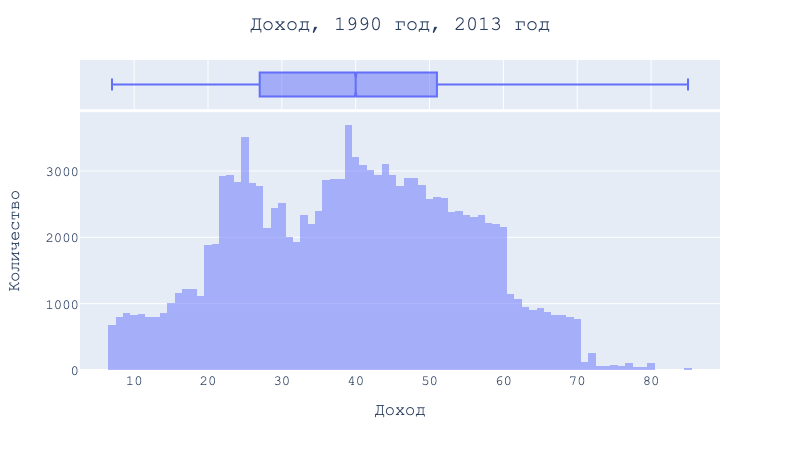

In [24]:
fig = px.histogram(df, x = 'age',  marginal ='box', barmode = 'overlay')
fig.update_layout(
    title='Доход, 1990 год, 2013 год',
    xaxis_title="Доход",
    yaxis_title="Количество",
    title_x=0.5,
    legend_title="Год",
    font=dict(
        family="Courier New, monospace",
        size=14
    )
)
gitly.show( fig )

* Уровень удовлетворенности даже не 50%.
* По данным пассажиров, в классе путешествий преобладают бизнес-класс (48%) и экономический класс (45%), а остальные — эконом-класс (7%).
* Возрастные выбросы не так значительны
<!-- * Satisfaction level is not even 50%.
* Travel class dominated by business class (48%) & economy class (45%), and the rest are economy class(7%) from the data of the passengers.
* Age outliers are not that significant  -->

In [25]:

# sns.catplot("Satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.5)  
# sns.catplot("Satisfaction", col="Customer Type", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.5)
# sns.catplot("Satisfaction", col="Class", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.5) 
# plt.show()


* Gender : Males and Females are almost the same with the satisfaction and dissatisfaction level so satisfaction behaviour is almost the same.
* Customer Type: Those who are returning are having almost the same level of people who are satisfied or Neutral or Dissatisfied and customers with first time are with most dissatisfied.
* Class : satisfaction level is more only for business class    

In [ ]:
# sns.catplot(x="Flight Distance", y="Type of Travel", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)
# sns.catplot(x="Departure and Arrival Time Convenience", y="Type of Travel", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)
# sns.catplot(x="On-board Service", y="Type of Travel", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)
# sns.catplot(x="Check-in Service", y="Type of Travel", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)
# sns.catplot(x="Online Boarding", y="Type of Travel", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)
# sns.catplot(x="Seat Comfort", y="Type of Travel", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)
# sns.catplot(x="Leg Room Service", y="Type of Travel", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)
# sns.catplot(x="Cleanliness", y="Type of Travel", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)
# sns.catplot(x="Food and Drink", y="Type of Travel", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)
# sns.catplot(x="In-flight Service", y="Type of Travel", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)
# plt.show()

In [ ]:
# print(pd.pivot_table(data=df,values='Age',index='Gender',columns='Class',aggfunc='count'))
# sns.countplot(x="Class", data=df,palette="mako")
# plt.show()

#### It can be seen that Gender and ID has no relation with the satisfaction so its better to drop for a perfect model creation. 
<u>Data Exploration and Data Visualisation<u> is done and data is ready for training and model creation

### <u>Preparing to build a model<u> 
* Multiple variables which are independent features to predict a dependent variable 
* Classify the data by replace method and drop columns which are not required 


In [28]:
df[:2]# df.rename(columns={"Customer Type":"Customer_Type"},inplace=True)
# df.rename(columns={"Type of Travel":"Type_of_Travel"},inplace=True)

,ID,gender,age,customerType,typeOfTravel,class,flightDistance,departureDelay,arrivalDelay,departureAndArrivalTimeConvenience,easeOfOnlineBooking,checkinService,onlineBoarding,gateLocation,onboardService,seatComfort,legRoomService,cleanliness,foodAndDrink,inflightService,inflightWifiService,inflightEntertainment,baggageHandling,satisfaction
0,1,Мужчина,48,Первый раз,Бизнес,Бизнес класс,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Удовлетворённый
1,2,Женщина,35,Возвращаемый,Бизнес,Бизнес класс,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Неудовлетворённый


In [30]:
df.satisfaction = df.satisfaction.replace({"Неудовлетворённый": 0, "Удовлетворённый": 1})
df['class'] = df['class'].replace({"Бизнес класс":2, "Эконом класс": 1, 'Эконом плюс': 0})
df.customerType = df.customerType.replace({'Первый раз': 0, 'Возвращаемый': 1}) 
df.typeOfTravel = df.typeOfTravel.replace({"Бизнес":0, "Личный": 1})

In [31]:
def age(agevalue):
    if agevalue < 40:
        return 1
    elif agevalue < 60:
        return 2
    else:
        return 3

In [33]:
df.age = df.age.apply(age)

#### Data is classified and now columns which are not required are dropped 

### <u>Dataset Preparation<u> 

In [34]:
d = df.copy()

In [36]:
d.drop(['gender',"ID"],axis=1, inplace=True)

In [37]:
d.sample(4)

,age,customerType,typeOfTravel,class,flightDistance,departureDelay,arrivalDelay,departureAndArrivalTimeConvenience,easeOfOnlineBooking,checkinService,onlineBoarding,gateLocation,onboardService,seatComfort,legRoomService,cleanliness,foodAndDrink,inflightService,inflightWifiService,inflightEntertainment,baggageHandling,satisfaction
40256,1,1,0,2,2946,0,0.0,3,3,5,4,3,1,4,4,4,4,2,3,4,2,0
22334,2,1,0,2,2686,0,0.0,5,5,5,3,5,4,4,4,1,5,4,5,4,4,0
81338,2,1,0,1,1299,0,0.0,5,5,3,3,5,3,4,3,4,1,3,3,3,3,1
353,2,1,1,0,821,23,10.0,5,2,5,5,4,2,4,2,4,2,2,2,2,2,1


#### Checking for the factors corelated with satisfaction 
* Statistics 
* Correlation 

In [38]:
d.describe()

,age,customerType,typeOfTravel,class,flightDistance,departureDelay,arrivalDelay,departureAndArrivalTimeConvenience,easeOfOnlineBooking,checkinService,onlineBoarding,gateLocation,onboardService,seatComfort,legRoomService,cleanliness,foodAndDrink,inflightService,inflightWifiService,inflightEntertainment,baggageHandling,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,1.600801,0.816908,0.309416,1.406136,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,0.565537
std,0.654171,0.386743,0.462255,0.621378,997.452477,38.071126,38.407410,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.495688
min,1.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,3.000000,1.000000,1.000000,2.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [40]:
cor = d.corr(method = 'pearson')
cor = round(abs(cor.satisfaction), 2)
cor.sort_values(ascending=False)

satisfaction                          1.00
onlineBoarding                        0.50
typeOfTravel                          0.45
class                                 0.45
inflightEntertainment                 0.40
seatComfort                           0.35
onboardService                        0.32
legRoomService                        0.31
cleanliness                           0.31
flightDistance                        0.30
inflightWifiService                   0.28
baggageHandling                       0.25
inflightService                       0.24
checkinService                        0.24
foodAndDrink                          0.21
customerType                          0.19
easeOfOnlineBooking                   0.17
age                                   0.09
arrivalDelay                          0.06
departureAndArrivalTimeConvenience    0.05
departureDelay                        0.05
gateLocation                          0.00
Name: satisfaction, dtype: float64

#### As expected gatelocation has no corelation with the satisfaction so we can avoid while creating model 

### Part 7: <u>Model Creation<u>

#### <u>Splitting the dataset:<u>
* test_size = 0.25 so that data is split into 75% and 25%
* random_state is applied so that each time we run we get the same result 

    
* Target is satisfaction of passengers.
* Features ( Customer Type, Age, Type of Travel, Class,
Seat comfort, Food and drink, In flight wifi service, In flight entertainment, Online support, Ease of Online booking,
On-board service, Leg room service, Baggage handling,
Check in service, Cleanliness, Online boarding).

In [ ]:
df[:2]

In [43]:
x = d.drop(['satisfaction', "gateLocation"], axis=1)
y = d['satisfaction']


In [44]:
x

,age,customerType,typeOfTravel,class,flightDistance,departureDelay,arrivalDelay,departureAndArrivalTimeConvenience,easeOfOnlineBooking,checkinService,onlineBoarding,onboardService,seatComfort,legRoomService,cleanliness,foodAndDrink,inflightService,inflightWifiService,inflightEntertainment,baggageHandling
0,2,0,0,2,821,2,5.0,3,3,4,3,3,5,2,5,5,5,3,5,5
1,1,1,0,2,821,26,39.0,2,2,3,5,5,4,5,5,3,5,2,5,5
2,2,1,0,2,853,0,0.0,4,4,4,5,3,5,3,5,5,3,4,3,3
3,2,1,0,2,1905,0,0.0,2,2,3,4,5,5,5,4,4,5,2,5,5
4,2,1,0,2,3470,0,1.0,3,3,3,5,3,4,4,5,4,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,1,0,447,2,3.0,4,4,4,4,5,1,4,4,4,5,4,4,4
129876,2,1,1,0,308,0,0.0,5,3,5,3,5,2,5,2,2,4,3,2,5
129877,2,1,1,0,337,6,14.0,5,2,4,2,3,3,4,3,3,4,2,3,5
129878,2,1,1,0,337,31,22.0,4,4,3,4,4,4,5,3,3,4,5,3,5


In [45]:
y

0         1
1         0
2         0
3         0
4         0
         ..
129875    1
129876    1
129877    1
129878    0
129879    1
Name: satisfaction, Length: 129880, dtype: int64

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=27)


In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(97410, 20)
(32470, 20)
(97410,)
(32470,)


#### Training the data with Some of the ML approaches:
* Logistic Regression
* KNN
* Random Forest Classifier
* Decision Tree Classifier
* Naive Bayes Classifier
* AdaBoost Classifier
    

####  ML approach Functions
* Model fitting
* Predicting using test 
* Accuracy score
* ROC curve
* AUC score
* confusion matrix
* Classification_matrix
* time taken by each model


In [48]:
def model_create(model, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    intial_time = time.time()
    model.fit(x_train,y_train.ravel())
        
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Точность прогноза = {}".format(accuracy))
    
    roc_auc = roc_auc_score(y_test, y_pred) 
    print("AUC ROC - Площадь под кривой ошибок = {}".format(roc_auc))
    
    time_taken = time.time()-intial_time
    print("Затраченное время = {}".format(time_taken))
    
    print(classification_report(y_test,y_pred,digits=5))
    
    plot_confusion_matrix(model, x_test, y_test,cmap = plt.cm.pink, normalize = 'all')
    
    plot_roc_curve(model, x_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

In [49]:
df_class_accuracy = pd.DataFrame(columns=['Метод', 'Точность', 'Площадь под кривой ошибок', 'Время'])

### <u>Logistic Regression :<u>
* Logistic regression models a relationship between predictor variables and a categorical response variable. Here, we could use logistic regression to model the relationship between various features of purchasing to predict if a person have lung cancer or not (a binary variable: either yes or no). Logistic regression helps us estimate a probability of falling into a certain level of the categorical response given a set of predictors.

Точность прогноза = 0.801632275947028
AUC ROC - Площадь под кривой ошибок = 0.7998296467681514
Затраченное время = 0.764807939529419
              precision    recall  f1-score   support

           0    0.76123   0.78673   0.77377     14001
           1    0.83411   0.81293   0.82338     18469

    accuracy                        0.80163     32470
   macro avg    0.79767   0.79983   0.79858     32470
weighted avg    0.80268   0.80163   0.80199     32470



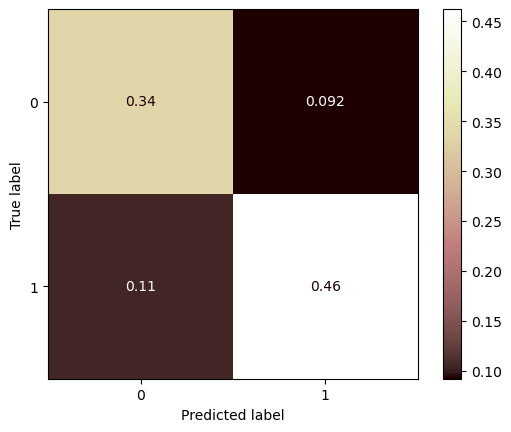

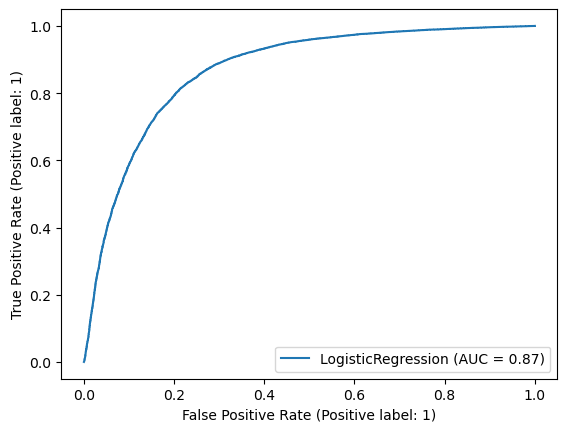

In [58]:
model_LR = LogisticRegression()
model_LR, accuracy_LR, roc_auc_LR, time_LR = model_create(model_LR, x_train, y_train, x_test, y_test)

df_class_accuracy.loc[len(df_class_accuracy)] = ['Logistic Regression', accuracy_LR, roc_auc_LR, time_LR]

### <u>Decision Tree:<u>
* Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

Точность прогноза = 0.9429319371727749
AUC ROC - Площадь под кривой ошибок = 0.9419903346940763
Затраченное время = 0.5964930057525635
              precision    recall  f1-score   support

           0    0.93268   0.93515   0.93391     14001
           1    0.95074   0.94883   0.94978     18469

    accuracy                        0.94293     32470
   macro avg    0.94171   0.94199   0.94185     32470
weighted avg    0.94295   0.94293   0.94294     32470



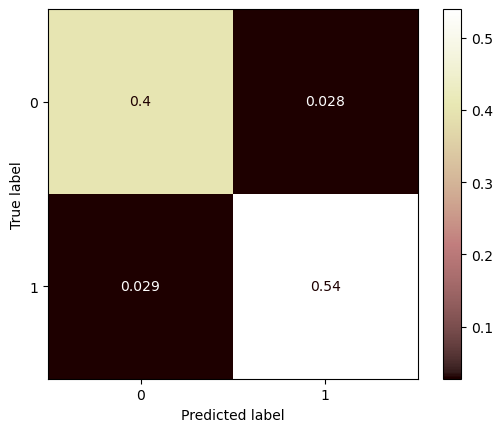

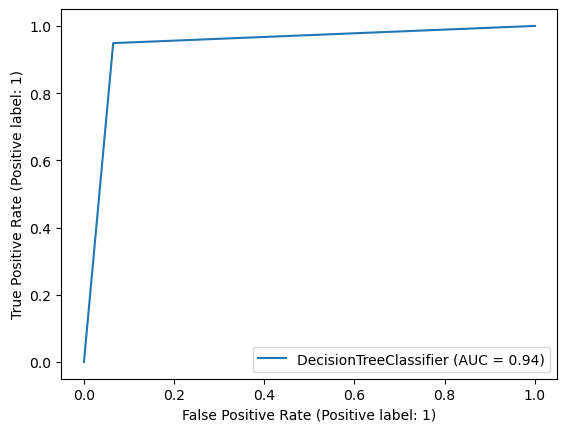

In [59]:
model_DC = DecisionTreeClassifier()
model_DC, accuracy_DC, roc_auc_DC, time_DC = model_create(model_DC, x_train, y_train, x_test, y_test)

df_class_accuracy.loc[len(df_class_accuracy)] = ['Decision Tree', accuracy_DC, roc_auc_DC, time_DC]

### <u>Random Forest:<u>
* Random forests is a supervised learning algorithm. It can be used both for classification and regression. 
* It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance. 

Точность прогноза = 0.9607637819525716
AUC ROC - Площадь под кривой ошибок = 0.9580367411779862
Затраченное время = 9.170745849609375
              precision    recall  f1-score   support

           0    0.96980   0.93822   0.95375     14001
           1    0.95429   0.97785   0.96593     18469

    accuracy                        0.96076     32470
   macro avg    0.96205   0.95804   0.95984     32470
weighted avg    0.96098   0.96076   0.96068     32470



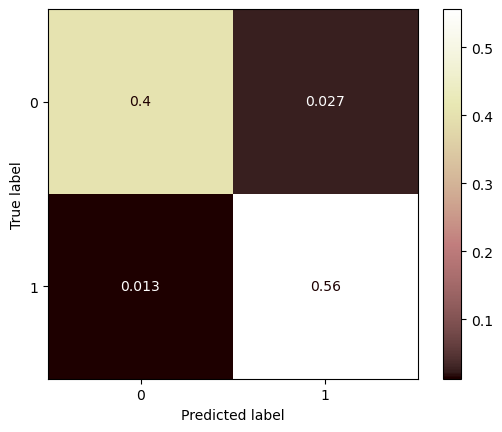

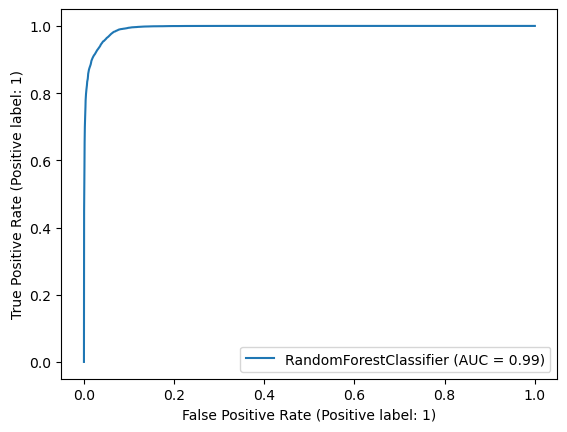

In [52]:
model_RF = RandomForestClassifier()
model_RF, accuracy_RF, roc_auc_RF, time_RF = model_create(model_RF, x_train, y_train, x_test, y_test)


df_class_accuracy.loc[len(df_class_accuracy)] = ['Random Forest', accuracy_RF, roc_auc_RF, time_RF]

### <u>Naive Bayes Classifier:<u>
* Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

Точность прогноза = 0.8665537419156144
AUC ROC - Площадь под кривой ошибок = 0.8606822805742443
Затраченное время = 0.13495421409606934
              precision    recall  f1-score   support

           0    0.86516   0.81801   0.84093     14001
           1    0.86751   0.90335   0.88507     18469

    accuracy                        0.86655     32470
   macro avg    0.86634   0.86068   0.86300     32470
weighted avg    0.86650   0.86655   0.86604     32470



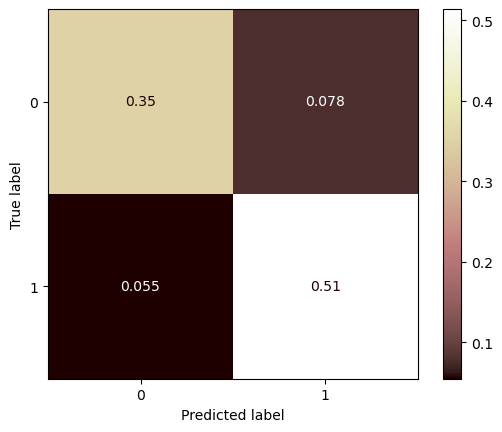

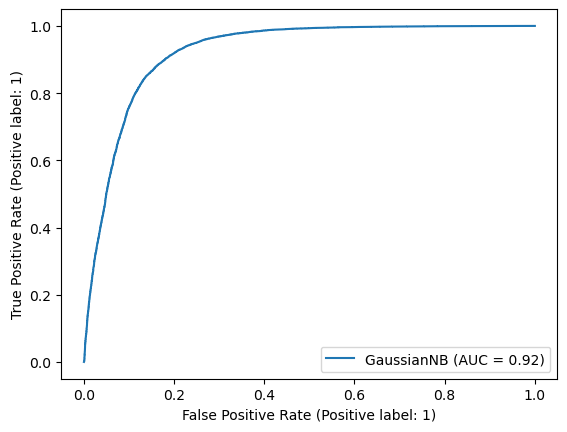

In [53]:
model_NB = GaussianNB() 
model_NB, accuracy_NB, roc_auc_NB, time_NB = model_create(model_NB, x_train, y_train, x_test, y_test)

df_class_accuracy.loc[len(df_class_accuracy)] = ['Naive Bayes Classifier', accuracy_NB, roc_auc_NB, time_NB]

### <u>K-Nearest Neighbors<u>
* The K-Nearest Neighbors or KNN Classification is a simple and easy to implement, supervised machine learning algorithm that is used mostly for classification problems but applicable for regression problems too.

Точность прогноза = 0.7860178626424392
AUC ROC - Площадь под кривой ошибок = 0.7749419126946869
Затраченное время = 64.98082709312439
              precision    recall  f1-score   support

           0    0.78456   0.69445   0.73676     14001
           1    0.78692   0.85543   0.81975     18469

    accuracy                        0.78602     32470
   macro avg    0.78574   0.77494   0.77825     32470
weighted avg    0.78590   0.78602   0.78396     32470



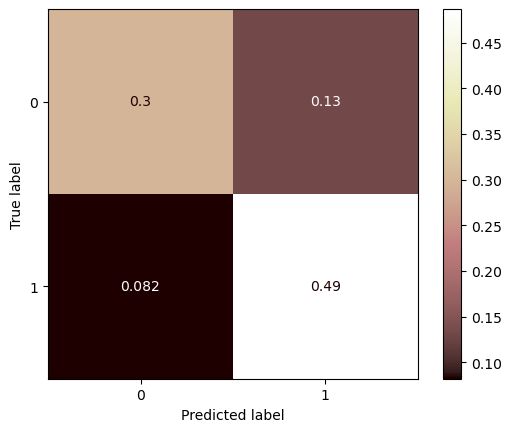

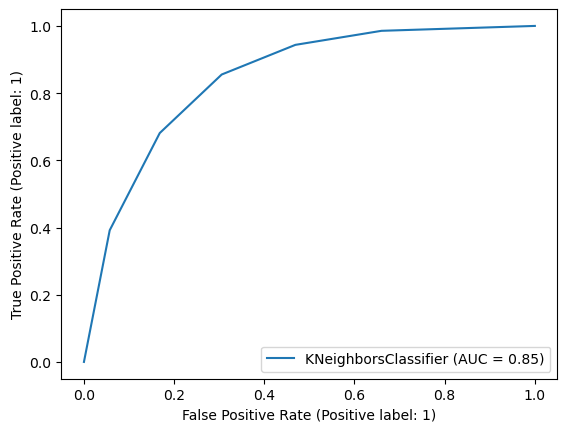

In [54]:
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN, accuracy_KNN, roc_auc_KNN, time_KNN = model_create(model_KNN, x_train, y_train, x_test, y_test)

df_class_accuracy.loc[len(df_class_accuracy)] = ['K-Nearest Neighbors', accuracy_KNN, roc_auc_KNN, time_KNN]

### AdaBoostClassifier
        - An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Точность прогноза = 0.9276562981213428
AUC ROC - Площадь под кривой ошибок = 0.9251671665555444
Затраченное время = 3.931118965148926
              precision    recall  f1-score   support

           0    0.92377   0.90708   0.91535     14001
           1    0.93051   0.94326   0.93684     18469

    accuracy                        0.92766     32470
   macro avg    0.92714   0.92517   0.92609     32470
weighted avg    0.92760   0.92766   0.92757     32470



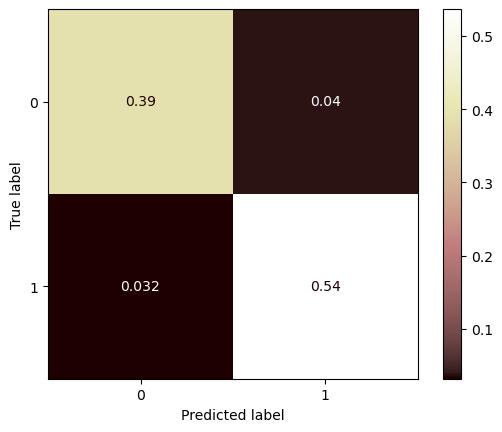

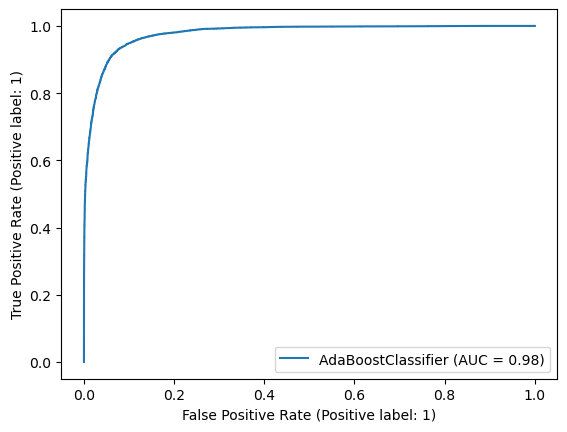

In [55]:
model_AB = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model_AB, accuracy_AB, roc_auc_AB, time_AB = model_create(model_AB, x_train, y_train, x_test, y_test)

df_class_accuracy.loc[len(df_class_accuracy)] = ['AdaBoostClassifier', accuracy_AB, roc_auc_AB, time_AB]

#### Сравнение моделей 
- Оценим модели с точки зрения ROC_AUC и общего времени, затраченного на выполнение.

In [65]:
df_class_accuracy.sort_values(by=['Точность'])

,Метод,Точность,Площадь под кривой ошибок,Время
3,K-Nearest Neighbors,0.786018,0.774942,64.980827
5,Logistic Regression,0.801632,0.799830,0.764808
0,Naive Bayes Classifier,0.866554,0.860682,0.105100
2,Naive Bayes Classifier,0.866554,0.860682,0.134954
4,AdaBoostClassifier,0.927656,0.925167,3.931119
6,Decision Tree,0.942932,0.941990,0.596493
1,Random Forest,0.960764,0.958037,9.170746


# график по трём столбца оценки 

<AxesSubplot:xlabel='Метод'>

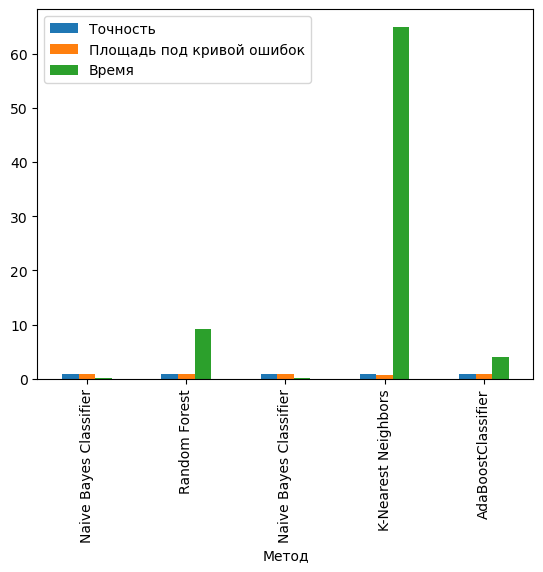

In [57]:
df_class_accuracy[['Метод', 'Точность', 'Площадь под кривой ошибок', 'Время']].plot(x='Метод', kind='bar')

### Conclusion:
* ROC-AUH curve is maximumum for **Random Forest** and minimum for **KNN** 
* Time taken is maximum for **KNN** and minimum for **Naive Bayes**
##### For a best model  prediction 
* Maximum ROC_AUC curve
* Minimum time is required 
#### Comparing **Random Forest** is the best from among the models trained to predict the accurate result with an **accuracy** of **96%** and **time taken** to execute is **8.95**